D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 84s 191ms/step - accuracy: 0.6807 - loss: 0.5496 - val_accuracy: 0.7986 - val_loss: 0.3840
Epoch 2/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - accuracy: 0.8246 - loss: 0.3542 - val_accuracy: 0.8474 - val_loss: 0.3291
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 55s 139ms/step - accuracy: 0.8558 - loss: 0.2995 - val_accuracy: 0.8551 - val_loss: 0.3062
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 54s 138ms/step - accuracy: 0.8826 - loss: 0.2574 - val_accuracy: 0.8700 - val_loss: 0.2897
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 54s 137ms/step - accuracy: 0.9119 - loss: 0.1986 - val_accuracy: 0.8884 - val_loss: 0.2765
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 55s 140ms/step - accuracy: 0.9413 - loss: 0.1437 - val_accuracy: 0.8899 - val_loss: 0.2749
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 133ms/step - accuracy: 0.9654 - loss: 0.0884 - val_accuracy: 0.8877 - val_loss: 0.3115
Epoch 8/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 52s 132ms/step - accuracy: 0.9789 - loss: 0

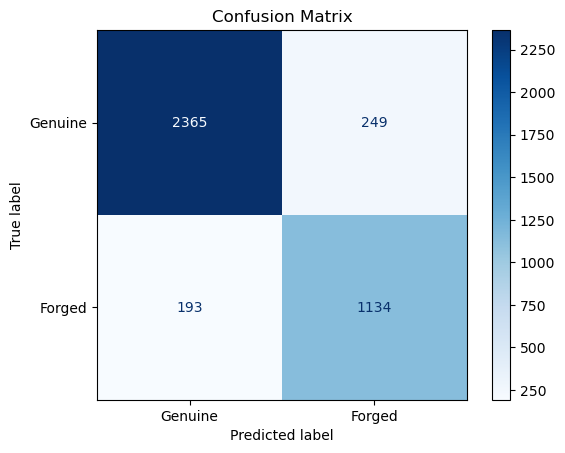

124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step


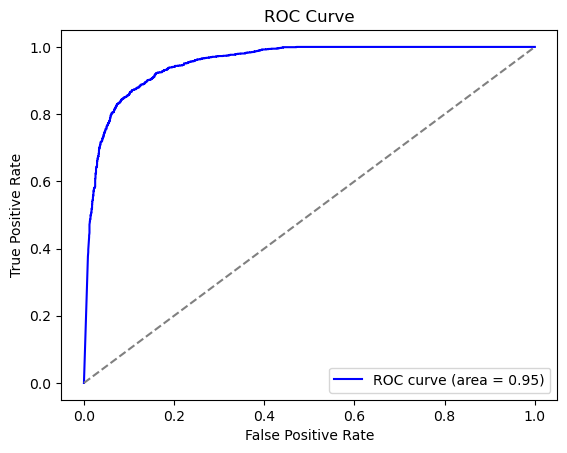

Model saved successfully.
Model loaded successfully.


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dataset Paths
dataset_paths = {
    'CEDAR': r"D:\signature\CEDAR_relocated",
    'GPDS': r"D:\signature\GPDS_1-150_RELOCATED",
    'ICDAR': r"D:\signature\ICDAR-2011_relocated"
}

# Load Images Function
def load_images(dataset_path):
    images = []
    labels = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for label, subfolder in enumerate(['original', 'forged']):
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.exists(subfolder_path):
                    for file in os.listdir(subfolder_path):
                        img_path = os.path.join(subfolder_path, file)
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, (128, 128))
                            images.append(img)
                            labels.append(label)
    return np.array(images), np.array(labels)

# Load All Datasets
all_images = []
all_labels = []

for dataset_name, dataset_path in dataset_paths.items():
    images, labels = load_images(dataset_path)
    all_images.append(images)
    all_labels.append(labels)

all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Normalize Images
all_images = all_images / 255.0
all_images = all_images.reshape(-1, 128, 128, 1)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Build CNN Model
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
model.summary()

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate Model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Genuine', 'Forged'])
cmd.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Save Model
model.save('signature_forgery_model_cnn.h5')
print("Model saved successfully.")




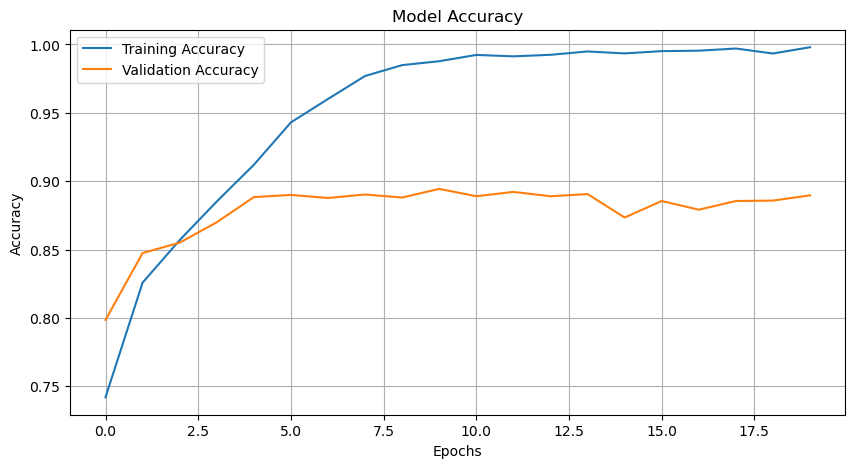

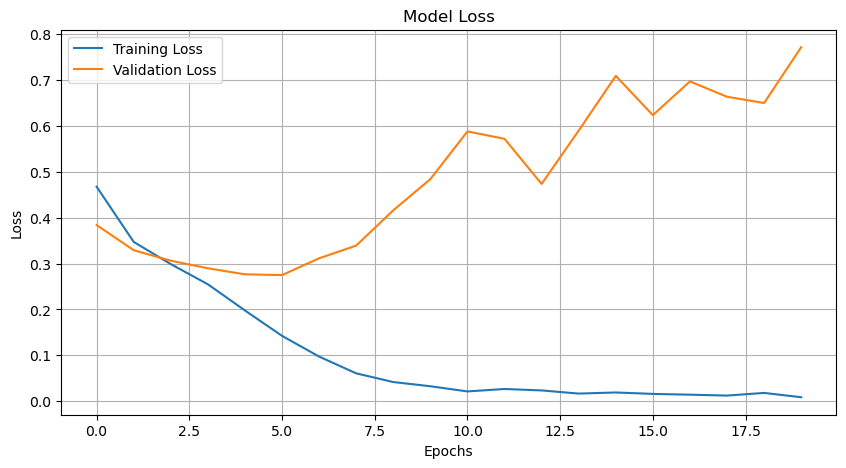

In [44]:
# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import tensorflow as tf
# Load Model
loaded_model = tf.keras.models.load_model('signature_forgery_model_cnn.h5')
print("Model loaded successfully.")


Model loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


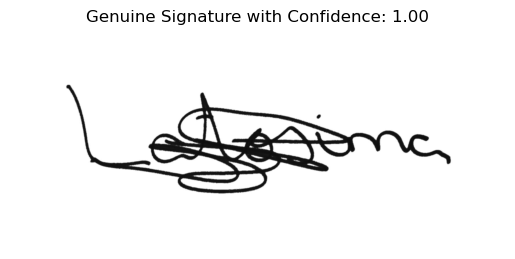

In [3]:
import cv2
import matplotlib.pyplot as plt
# Function to Highlight Forged Areas with Circles
def highlight_forgery(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (128, 128)) / 255.0
    img_resized = img_resized.reshape(1, 128, 128, 1)
    prediction = loaded_model.predict(img_resized)[0][0]

    if prediction > 0.5:
        img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        edges = cv2.Canny(img, 50, 150)  # Edge Detection
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        for contour in contours:
            if cv2.contourArea(contour) > 50:  # Filter small noise
                (x, y), radius = cv2.minEnclosingCircle(contour)
                center = (int(x), int(y))
                radius = int(radius)
                cv2.circle(img_color, center, radius, (0, 0, 255), 2)  # Draw red circle
        
        plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
        plt.title(f"Forgery Detected with Confidence: {prediction:.2f}")
        plt.axis('off')
        plt.show()
    else:
        plt.imshow(img, cmap='gray')
        plt.title(f"Genuine Signature with Confidence: {1-prediction:.2f}")
        plt.axis('off')
        plt.show()

# Example Usage
image_path =  r"D:\signature\GPDS_1-150_RELOCATED\118\Original\c-118-03 (Copy).jpg"# Replace with your image path
highlight_forgery(image_path)